In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [4]:
airline = pd.read_excel('C:\\Users\\ujwala\\Downloads\\EastWestAirlines(1).xlsx')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
airline2 = airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
airline2_norm = pd.DataFrame(normalize(airline2),columns=airline2.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


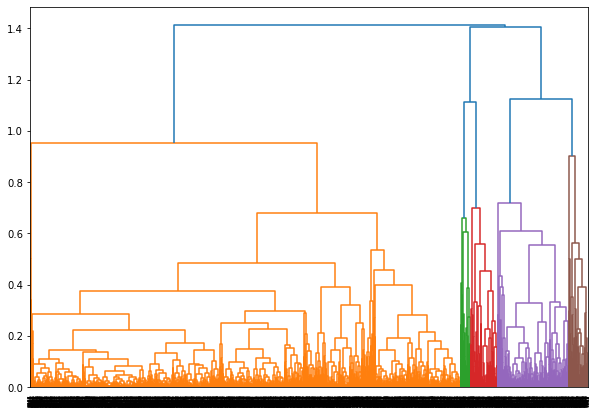

In [6]:
plt.figure(figsize=(10,7))
dendograms = sch.dendrogram(sch.linkage(airline2_norm,'complete'))

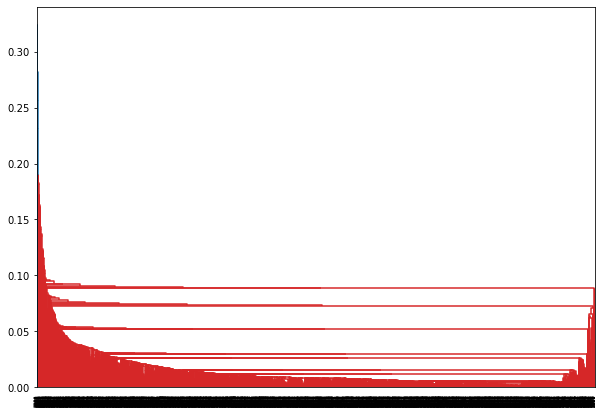

In [7]:
plt.figure(figsize=(10,7))
dendograms = sch.dendrogram(sch.linkage(airline2_norm,'single'))

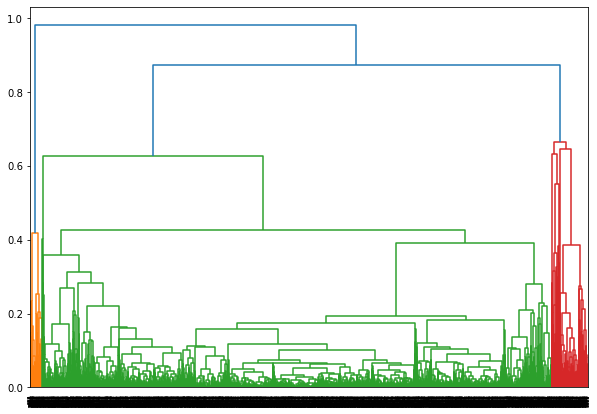

In [8]:
plt.figure(figsize=(10,7))
dendograms = sch.dendrogram(sch.linkage(airline2_norm,'average'))

In [9]:
hcluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
hcluster

AgglomerativeClustering(n_clusters=5)

In [10]:
y = pd.DataFrame(hcluster.fit_predict(airline2_norm),columns=['clusterid'])
y['clusterid'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: clusterid, dtype: int64

In [11]:
airline2['clustersid']=hcluster.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [12]:
airline2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


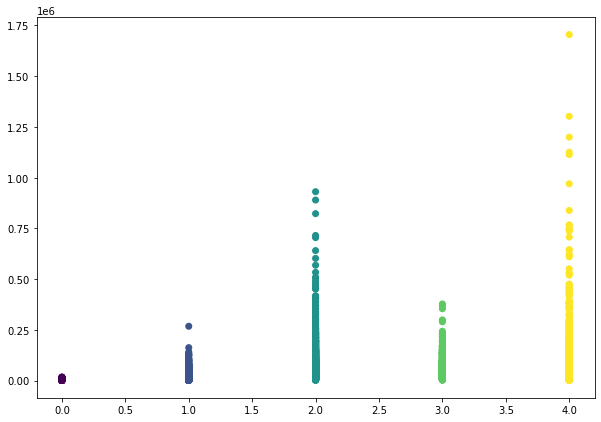

In [13]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hcluster.labels_) 

In [14]:
from sklearn.preprocessing import StandardScaler
std_df = StandardScaler().fit_transform(airline2)
std_df.shape

(3999, 12)

In [15]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(airline2)
minmax_df.shape

(3999, 12)

### PCA

In [16]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(airline2)

In [17]:
print(pca_std.singular_values_)

[6403347.2223788]


In [18]:
print(pca_std.explained_variance_ratio_*100)

[95.44022018]


In [19]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([95.44022018])

### Running PCA of MinMaxscalar data.

In [20]:
from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [21]:
print(pca_minmax.singular_values_)

[32.94972703 21.02283004 17.559187   14.91754948  6.54752302]


In [22]:
print(pca_minmax.explained_variance_ratio_*100)

[49.69688661 20.23055971 14.11348766 10.18639502  1.96236418]


In [5]:
pip install yellowbrick

SyntaxError: invalid syntax (<ipython-input-5-6e74d6b45503>, line 1)

### KMeans Clustering

model1


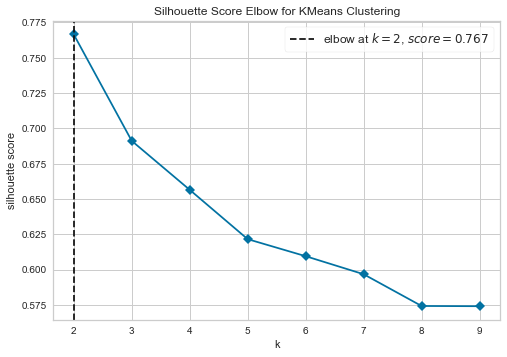

model2


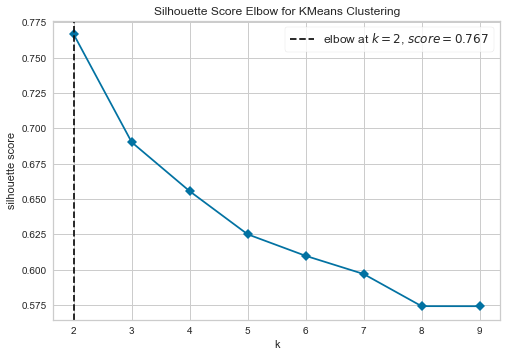

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(n_clusters=-1, random_state=0)
model2 = KMeans(n_clusters=-1, random_state=10, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(pca_std_df)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(pca_std_df)    
visualizer2.poof()
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.7665029062086975
For n_clusters = 3 The average silhouette_score is : 0.6911210859880597
For n_clusters = 4 The average silhouette_score is : 0.6564600969568646
For n_clusters = 5 The average silhouette_score is : 0.6215062712011543
For n_clusters = 6 The average silhouette_score is : 0.6094430826451254
For n_clusters = 7 The average silhouette_score is : 0.5966804694936505
For n_clusters = 8 The average silhouette_score is : 0.5741751489020225
For n_clusters = 9 The average silhouette_score is : 0.5740146542593099


model3


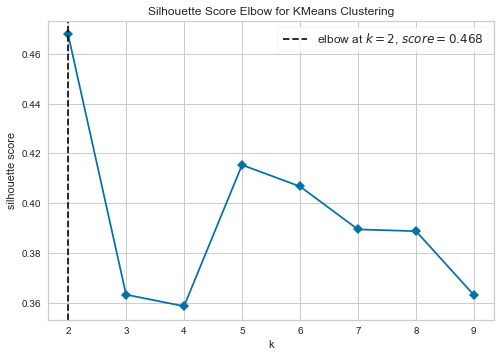

model4


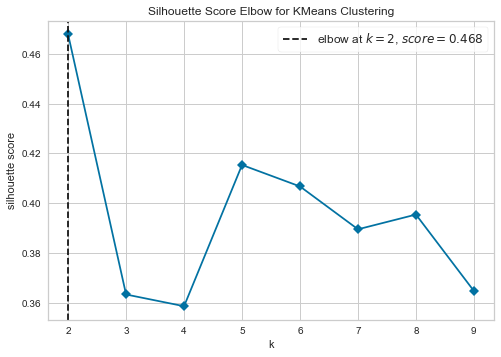

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model3 = KMeans(random_state=0,n_clusters=-1)
model4 = KMeans(random_state=10, n_clusters=-1, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer3 = KElbowVisualizer(model3, k=(2,10), metric='silhouette', timings=False)
visualizer4 = KElbowVisualizer(model4, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model3')
visualizer3.fit(pca_minmax_df)    
visualizer3.poof()
plt.show()

print('model4')
visualizer4.fit(pca_minmax_df)    
visualizer4.poof()
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : -0.24746579757564974
For n_clusters = 3 The average silhouette_score is : -0.24746579757564974
For n_clusters = 4 The average silhouette_score is : -0.24746579757564974
For n_clusters = 5 The average silhouette_score is : -0.24746579757564974
For n_clusters = 6 The average silhouette_score is : -0.24746579757564974
For n_clusters = 7 The average silhouette_score is : -0.24746579757564974
For n_clusters = 8 The average silhouette_score is : -0.24746579757564974
For n_clusters = 9 The average silhouette_score is : -0.24746579757564974


### Run K-Means

In [35]:
model1 = KMeans(n_clusters=6, random_state=0)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

(3999,)

In [36]:
y_predict1

array([0, 0, 0, ..., 4, 4, 0])

In [37]:
model1.labels_

array([0, 0, 0, ..., 4, 4, 0])

In [38]:
model1.cluster_centers_

array([[ -51337.62627801],
       [ 104139.64756023],
       [ 655990.07606866],
       [ 293102.65670036],
       [   9805.27613434],
       [1211320.0553912 ]])

In [39]:
model1.inertia_

2750196378029.256

In [40]:
model1.score(pca_std_df) 


-2750196378029.2554

In [41]:
model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

### visualizing silhoutte score..for different cluster

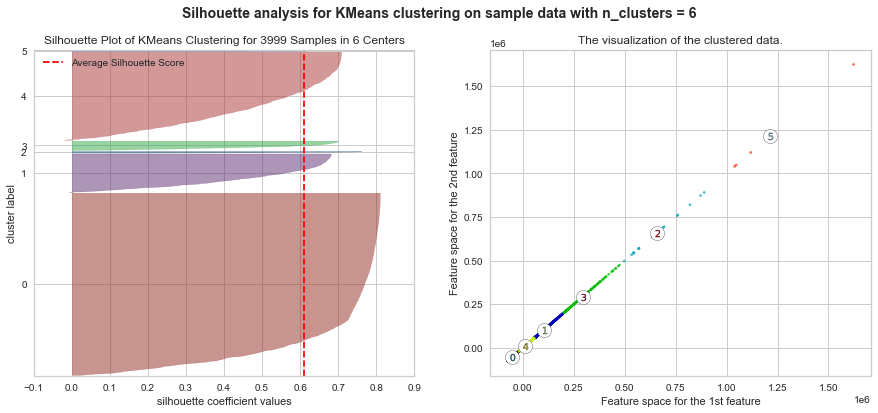

In [45]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_df[:, 0], pca_std_df[:, 0], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 0], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[0], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [47]:
model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [49]:
Kmeans_df = pd.concat([airline2.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,Kmeans_Clustering
0,28143,0,1,1,1,174,1,0,0,7000,0,4,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,4


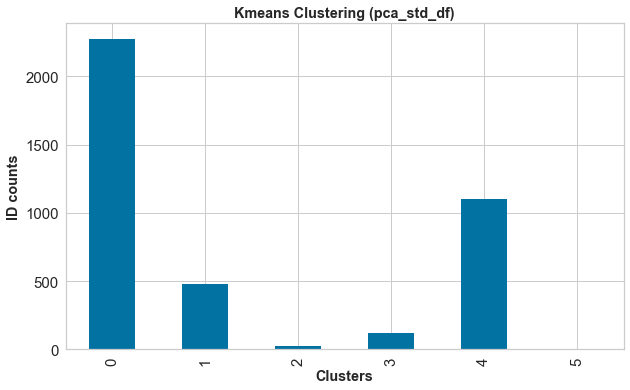

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['Balance'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [56]:
count_df = Kmeans_df.groupby(['Kmeans_Clustering']).count()
count_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
Kmeans_Clustering,,,,,,,,,,,,
0,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
1,479,479,479,479,479,479,479,479,479,479,479,479
2,22,22,22,22,22,22,22,22,22,22,22,22
3,118,118,118,118,118,118,118,118,118,118,118,118
4,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100
5,5,5,5,5,5,5,5,5,5,5,5,5


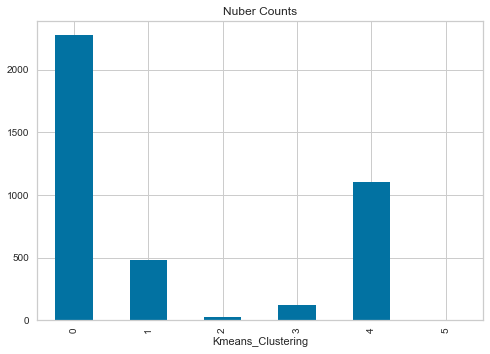

In [60]:
count = count_df.xs('Balance' ,axis = 1)
count.plot(kind='bar', title= 'Nuber Counts')
plt.show()

In [61]:
cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2].mean(),columns= ['Cluster3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3].mean(),columns= ['Cluster4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4].mean(),columns= ['Cluster5_avg'])

In [62]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg,Cluster4_avg,Cluster5_avg
Balance,23058.619341,176887.062630,728360.045455,364904.415254,83288.387273
Qual_miles,97.161758,268.252610,258.636364,445.288136,146.276364
cc1_miles,1.516044,3.070981,3.500000,3.186441,2.589091
cc2_miles,1.017582,1.008351,1.000000,1.025424,1.010000
cc3_miles,1.004835,1.029228,1.136364,1.000000,1.019091
Bonus_miles,8190.575824,34696.192067,62470.818182,49647.245763,23528.164545
Bonus_trans,8.400879,17.298539,22.000000,20.050847,14.568182
Flight_miles_12mo,234.327912,896.060543,1600.909091,1576.440678,584.037273
Flight_trans_12,0.735385,2.436326,5.727273,4.703390,1.740909
Days_since_enroll,3706.602637,4963.043841,6189.681818,5686.940678,4376.327273


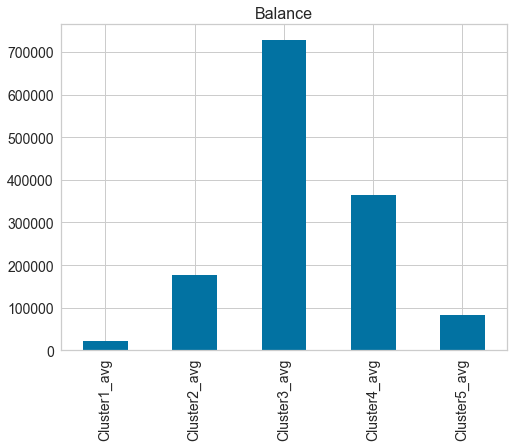

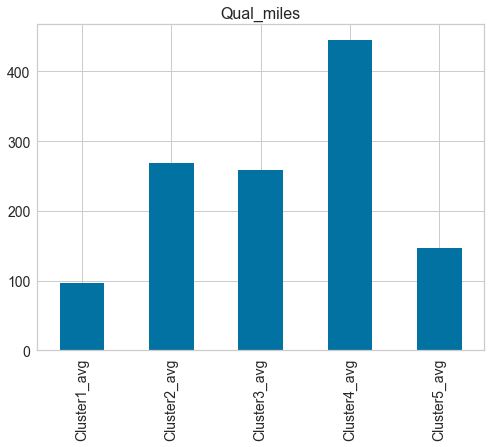

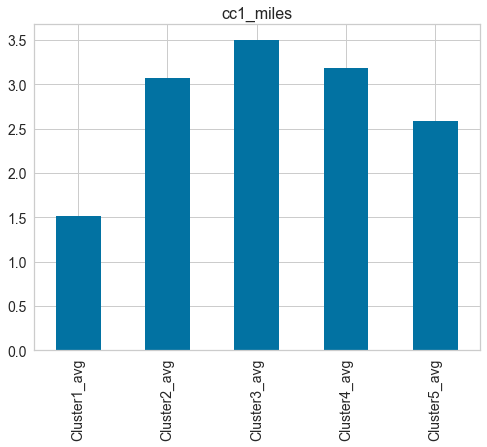

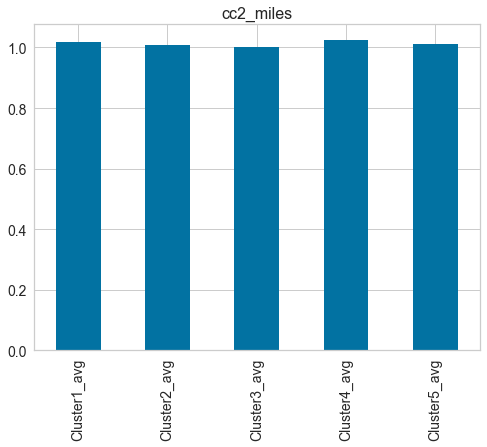

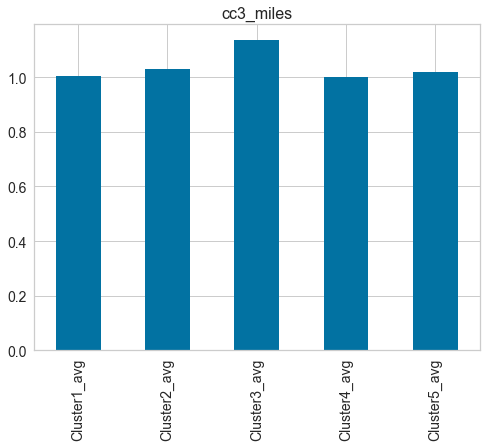

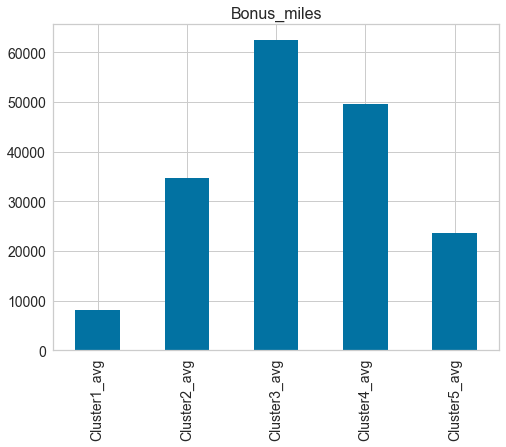

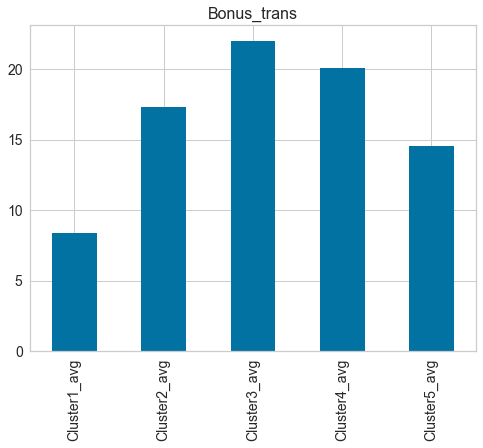

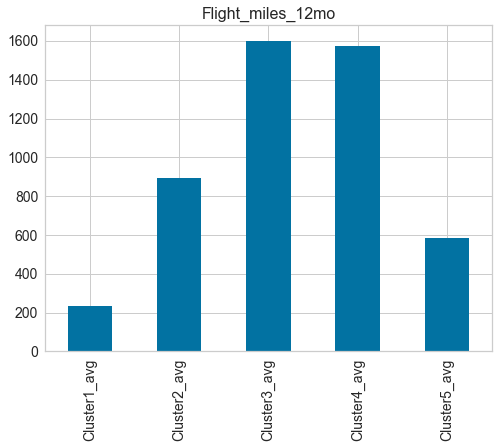

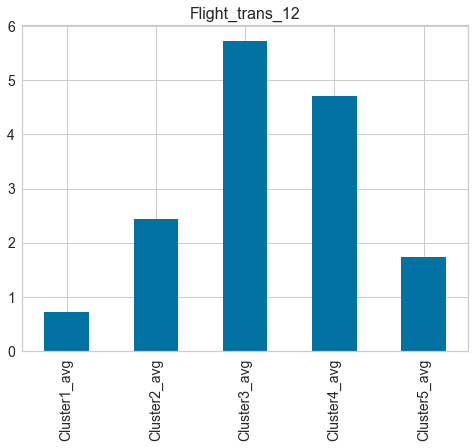

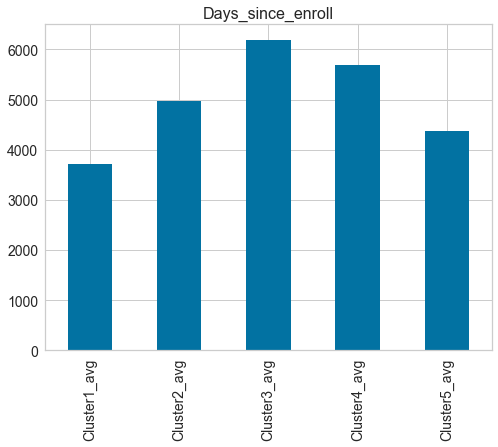

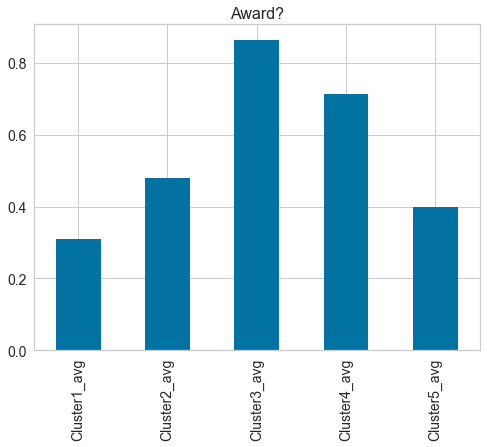

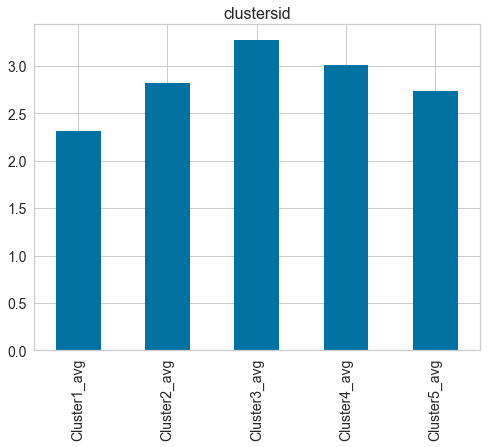

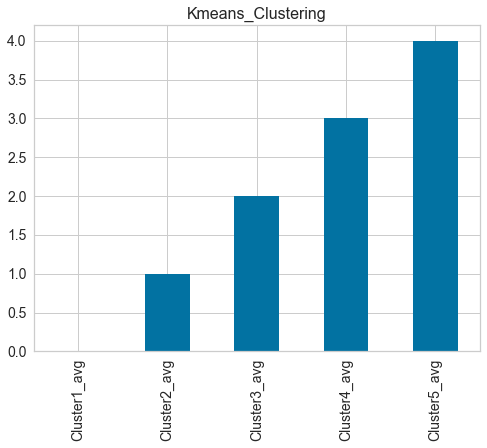

In [63]:
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()